In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, tree
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, \
    cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
# to encode labels to numbers
from sklearn.preprocessing import StandardScaler # to standardize
from sklearn.svm import SVC # import support vector classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # import random forest
from sklearn.naive_bayes import GaussianNB # import gaussian naive bayes
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier # imports KNN model
from sklearn.inspection import DecisionBoundaryDisplay
# this import allows for visualization of decision regions formulated by models
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import warnings
from sklearn.exceptions import ConvergenceWarning



plt.style.use('bmh')

#import necessary methods and libraries

# 1. Data Understanding
View Data


Dtypes

Describe

Shape

In [2]:
df = pd.read_csv('IRIS.csv')

#initial view of data
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
print(f"Num columns {df.shape[1]}")
print(f"Num rows {df.shape[0]}")
print(df.shape)

Num columns 5
Num rows 150
(150, 5)


In [4]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

# 2. Data Preparation
Drop unused rows/columns 

Identify duplicates/null values 

Rename columns if needed

Feature creation

In [7]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.duplicated()
# no duplicates or null values found

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [9]:
# all rows/columns will be used, for training and testing
# but we will use 2 values for sample visualization
# im fine with column labels
encoder = LabelEncoder()



x2 = df.drop(['species', 'petal_length', 'petal_width'], axis=1)
x = df.drop(['species'],axis=1)
y = df[['species']]

encoded_y = encoder.fit_transform(y)


x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y, test_size=0.2)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
# encoded_y


c:\Users\brady\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 3. Feature Understanding
Get a feel for the features themselves

Text(0.5, 0.98, 'Histograms for Different Iris Flower Features')

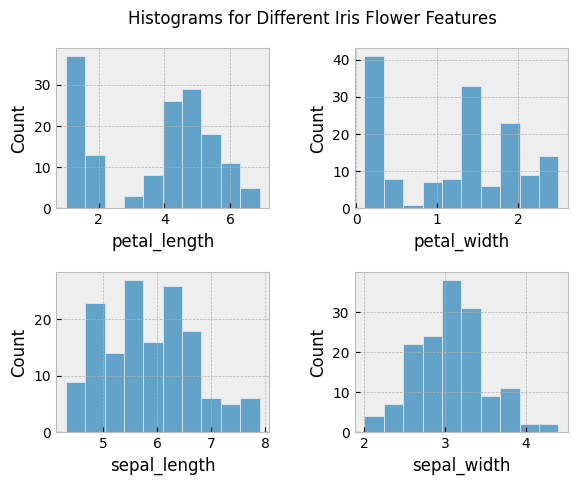

In [10]:
plt.subplot(2, 2, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4, left=0.1, right=0.9, top=0.9, bottom=0.1)

sns.histplot(data=df, x='petal_length', bins=10)
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='petal_width', bins=10)
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='sepal_length', bins=10)
plt.subplot(2, 2, 4)
sns.histplot(data=df, x='sepal_width', bins=10)

plt.suptitle("Histograms for Different Iris Flower Features")

<Axes: xlabel='species', ylabel='count'>

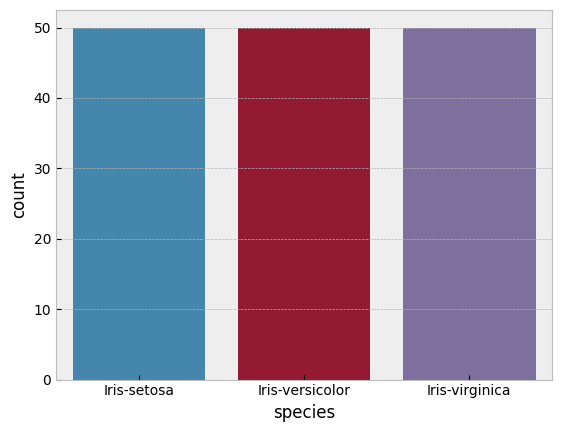

In [11]:
sns.countplot(data=df, x='species',hue='species')
# we have an even distribution of 50-50-50 different species

# 4. Feature Relationships
Find any sort of correlation/relationship between different features

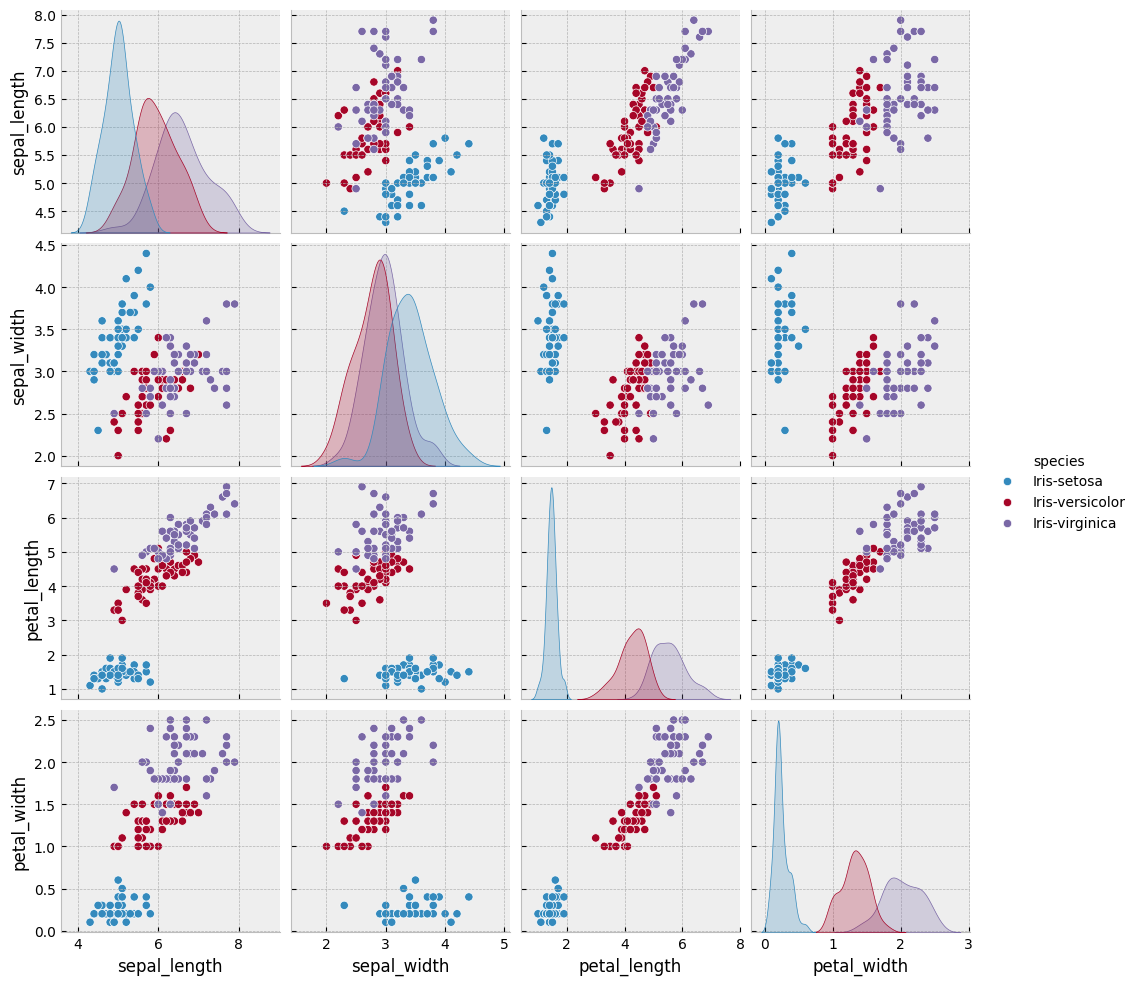

In [12]:
sns.pairplot(data=df, hue='species')

<Axes: >

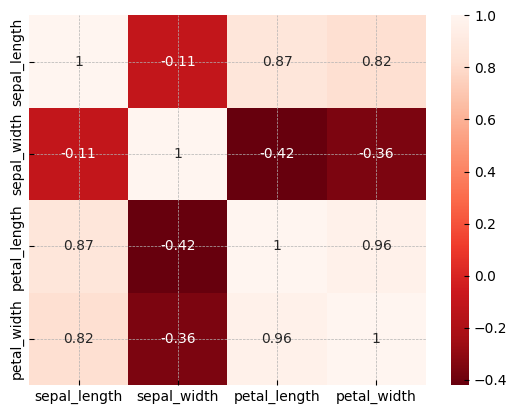

In [13]:
df_corr = df.drop(['species'],axis=1).corr()
sns.heatmap(df_corr, cmap="Reds_r",annot=True)
# here we see petal width vs length have the strongest corr
# followed by petal and sepal length

# 5. Feature Engineering
Build and evaluate ML models

Cross-validate and tune hyperparameters where necessary

### When to Simplify Metric Reports

High-Level Summaries – If presenting to a non-technical audience, a single metric (like F1-score or accuracy) might be enough.

Balanced Datasets – If classes are balanced, accuracy alone can sometimes be sufficient.

Consistent Performance – If training and test scores are similar across all metrics, you might only report key ones like F1-score or accuracy.

### When to Use All Metric Reports

Model Evaluation & Debugging - for fine-tuning a model, seeing metrics will help to see problems like:
* Overfitting (high train scores, low test scores)
* Underfitting (low scores on both partitions)
* Class Imbalance Effects (poor evaluation for minority classes)

Balanced Datasets - classes are balanced, accuracy alone may be sufficient

Consistent Performacne -if training and test scores are similar across all metrics, consider only reporting key metrics like F1 or accuracy

### 5.1 Support Vector Machine
Evaluate which kernels to use for the SVM

SKF Results (Accuracy): [0.83333333 0.70833333 0.91666667 0.66666667 0.70833333 0.75
 0.70833333 0.70833333 0.875      0.75       0.79166667 0.70833333
 0.79166667 0.70833333 0.79166667]
Mean Accuracy: 0.7611111111111111
SKF Results (Accuracy): [0.875      0.70833333 0.875      0.625      0.66666667 0.79166667
 0.70833333 0.625      0.83333333 0.83333333 0.83333333 0.70833333
 0.83333333 0.70833333 0.79166667]
Mean Accuracy: 0.7611111111111112
SKF Results (Accuracy): [0.70833333 0.70833333 0.75       0.70833333 0.66666667 0.75
 0.75       0.66666667 0.70833333 0.66666667 0.75       0.58333333
 0.75       0.75       0.70833333]
Mean Accuracy: 0.7083333333333334
SKF Results (Accuracy): [0.875      0.75       0.91666667 0.79166667 0.75       0.83333333
 0.83333333 0.70833333 0.83333333 0.83333333 0.79166667 0.70833333
 0.83333333 0.79166667 0.83333333]
Mean Accuracy: 0.8055555555555556


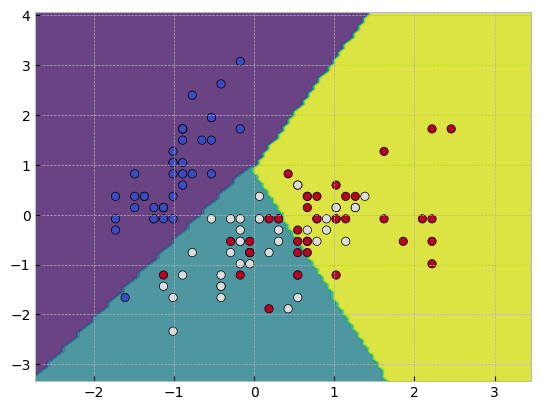

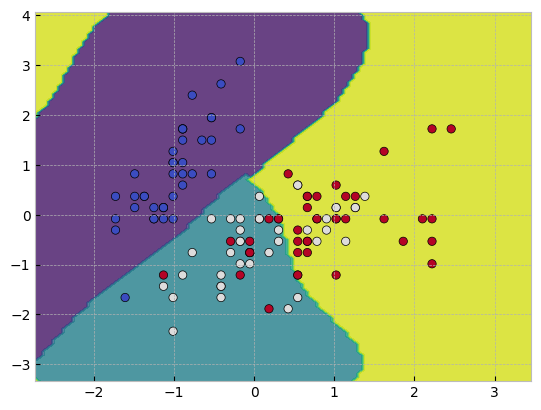

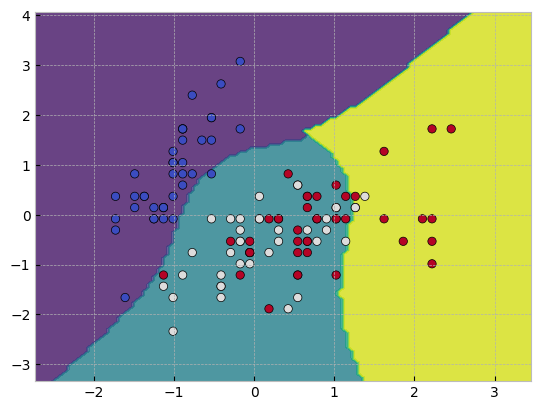

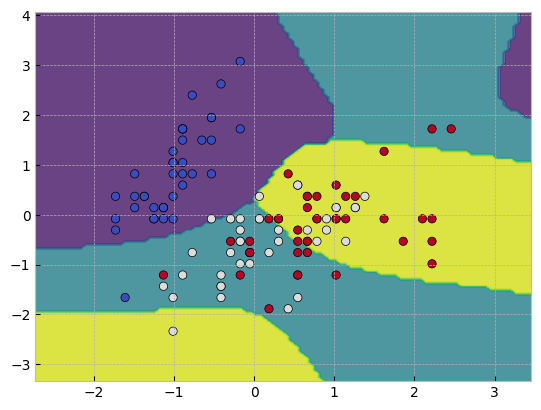

In [14]:
# to visualize, we will first apply on 2d set
scaler = StandardScaler()
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
x2_train = scaler.fit_transform(x2_train)
x2_test = scaler.transform(x2_test)

for i, kernel in enumerate (kernels):
    clf = svm.SVC(kernel = kernel)
    clf.fit(x2_train,y2_train.values.ravel())
    
    skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
    # 5 partitions, run the cross validation 3 times, with shuffled partitions
    
    skf_results = cross_val_score(clf, x2_train, y2_train.values.ravel(), cv=skf)
    
    print(f'SKF Results (Accuracy): {skf_results}')
    print(f'Mean Accuracy: {skf_results.mean()}')
  
    encoded_y2 = encoder.fit_transform(y2_train.values.ravel())
    
    disp = DecisionBoundaryDisplay.from_estimator(clf,x2_train,response_method='predict',alpha=0.8)
    disp.ax_.scatter(x2_train[:, 0], x2_train[:, 1], c=encoded_y2, 
                     cmap=plt.cm.coolwarm, edgecolor='k')
    
    # plt.show()
    

In [15]:
for i, kernel in enumerate (kernels):
    clf = svm.SVC(kernel = kernel)
    clf.fit(x_train,y_train.values.ravel())
    
    rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
    # does 
    
    rskf_results = cross_val_score(clf, x_train, y_train.values.ravel(), cv=rskf)
    # note,
    
    print(f'SKF Results (Accuracy): {rskf_results}')
    print(f'Mean Accuracy: {rskf_results.mean()}')
    
    # performance for linear model seems good, we will use this kernel

SKF Results (Accuracy): [1.         1.         0.95833333 1.         1.         1.
 0.95833333 0.95833333 0.91666667 1.         0.95833333 1.
 1.         0.95833333 1.        ]
Mean Accuracy: 0.9805555555555556
SKF Results (Accuracy): [1.         0.95833333 0.91666667 0.95833333 1.         0.95833333
 1.         0.95833333 0.91666667 0.95833333 1.         0.95833333
 0.95833333 0.91666667 0.95833333]
Mean Accuracy: 0.9611111111111111
SKF Results (Accuracy): [1.         1.         0.83333333 0.95833333 1.         1.
 0.91666667 0.95833333 0.95833333 1.         0.95833333 1.
 0.95833333 0.95833333 1.        ]
Mean Accuracy: 0.9666666666666668
SKF Results (Accuracy): [0.08333333 0.33333333 0.33333333 0.33333333 0.33333333 0.08333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.04166667 0.33333333
 0.33333333 0.33333333 0.33333333]
Mean Accuracy: 0.2805555555555556


In [16]:
'''
things to evaluate a classification model: metrics such as accuracy, 
precision, recall, F1 score and confusion matrix
since we are trying to evaluate models, we will report all metrics for training/testing
ACCURACY - # of correct predictions : # of total predictions
    ^ fundamental metric
PRECISION - # of correctly predicted positives : (# of actual positive + false positive)
    ^ proportion of all predicted positives and correctly predicted positives, higher = less false positives
RECALL - # of correctly predicted postives : (# of actual positive + # false negatives)
    ^ true positive rate: proportion of all actual positives that were classified correctly as positive
    ^ higher = less false negatives 
F1 - basically a mix of precision and recall, like accuracy. Tells how well the model performs
           in minimizing false positives and negatives
    ^ Micro - averages of all f1 scores for classes, treats classes equally WE WILL USE
    ^ Macro - computes global f1 score, gives more weight to larger classes, better for imbalanced classes
'''

'\nthings to evaluate a classification model: metrics such as accuracy, \nprecision, recall, F1 score and confusion matrix\nsince we are trying to evaluate models, we will report all metrics for training/testing\nACCURACY - # of correct predictions : # of total predictions\n    ^ fundamental metric\nPRECISION - # of correctly predicted positives : (# of actual positive + false positive)\n    ^ proportion of all predicted positives and correctly predicted positives, higher = less false positives\nRECALL - # of correctly predicted postives : (# of actual positive + # false negatives)\n    ^ true positive rate: proportion of all actual positives that were classified correctly as positive\n    ^ higher = less false negatives \nF1 - basically a mix of precision and recall, like accuracy. Tells how well the model performs\n           in minimizing false positives and negatives\n    ^ Micro - averages of all f1 scores for classes, treats classes equally WE WILL USE\n    ^ Macro - computes glo

In [17]:
# data fram to display evaluation results to later interpret
tests = ['Accuracy test', 'Accuracy train', 
           'Precision test', 'Precision train',
           'Recall test', 'Recall train',
           'F1 macro test', 'F1 macro train']
evals = pd.DataFrame(index=tests)

In [18]:
# function to create a table for all metrics for every model made
# use the same data
# note: when to standardize? a model assume normality or relies on distance
# ex: SVMS, regression, KNN, MLP 
# when not to do: tree-based methods (random forests, gradient boosting, decision trees, naive bayes)
x_train_standard = scaler.fit_transform(x_train)
x_test_standard = scaler.transform(x_test)
def evaluation(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    vals = []
    y_pred_train = model.predict(x_train)
    # predicted y values on the training subset
    y_pred_test = model.predict(x_test)
    # predicted y values on testing subset
    res_test = classification_report(y_test,y_pred_test, output_dict=True)
    res_train = classification_report(y_true=y_train, y_pred=y_pred_train, output_dict=True)
    
    vals.append(accuracy_score(y_true=y_test, y_pred=y_pred_test))
    vals.append(accuracy_score(y_true=y_train, y_pred=y_pred_train))
    
    vals.append(res_test['weighted avg']['precision'])
    vals.append(res_train['weighted avg']['precision'])
    
    vals.append(res_test['weighted avg']['recall'])
    vals.append(res_train['weighted avg']['recall'])
    
    vals.append(res_test['weighted avg']['f1-score'])
    vals.append(res_train['weighted avg']['f1-score'])
    # append metrics to a list to add to evaluation dataframe for later interpretation
    
    # output confusion matrix
    # print(res_test)
    cm_test = confusion_matrix(y_true=y_test,y_pred=y_pred_test)
    cm_train = confusion_matrix(y_true=y_train,y_pred=y_pred_train)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test,display_labels=model.classes_)
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model.classes_)
    disp_train.plot()
    plt.title("train")
    disp_test.plot()
    plt.title("test")
    plt.show()
    
    
    
    return vals
    
    
    

c:\Users\brady\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


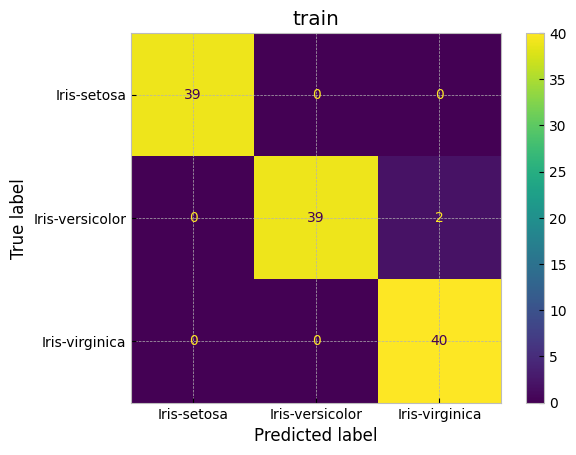

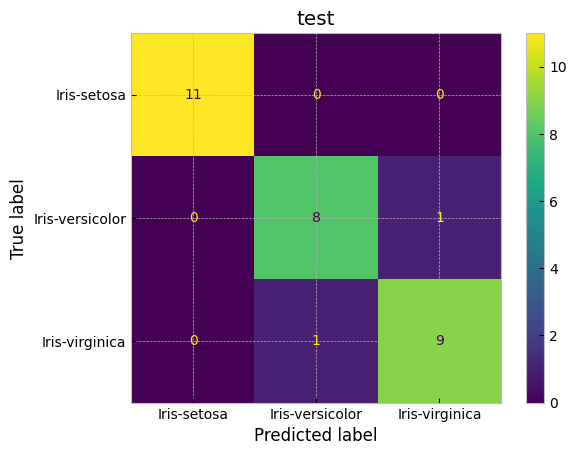

,SVM
Accuracy test,0.933333
Accuracy train,0.983333
Precision test,0.933333
Precision train,0.984127
Recall test,0.933333
Recall train,0.983333
F1 macro test,0.933333
F1 macro train,0.983328


In [ ]:
# evaluate a SVM
clf = SVC(kernel='linear', probability=True,random_state=42)
# clf.predict()
scores = evaluation(clf, x_train_standard, x_test_standard, y_train.values.ravel(), y_test)
evals['SVM'] = scores
evals



c:\Users\brady\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


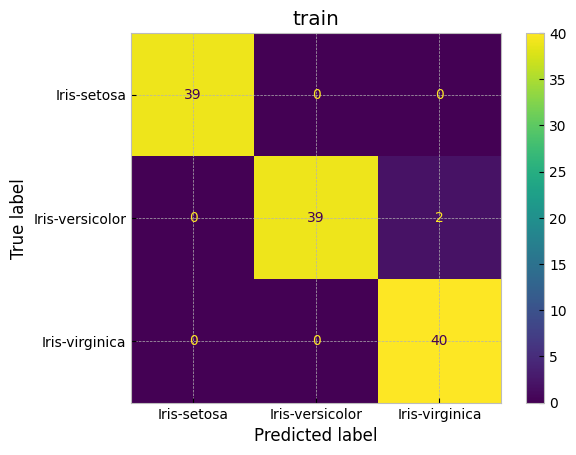

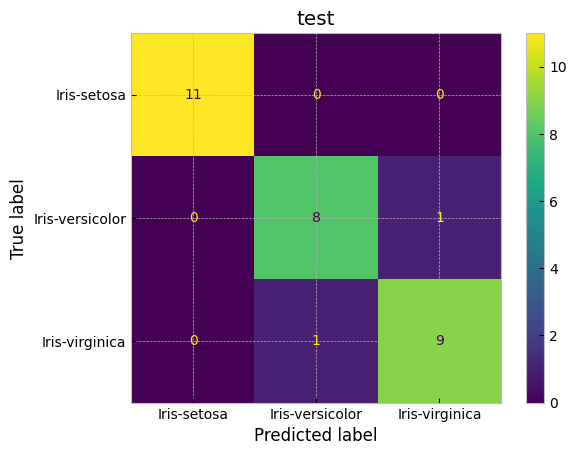

In [ ]:
# tune SVM and evaluate
param_grid = {'C': np.arange(1,10,0.1),
              'kernel':['linear','poly','rbf','sigmoid']}
# ^ parameters to tune for given model 
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

tuned = GridSearchCV(estimator=clf, param_grid=param_grid, cv=rskf)
# consider using randomizedSearchCV, less exhaustive but better for larger parameter sets
tuned.fit(x_train_standard,y_train.values.ravel())
# fit the data to the training data then get the tuned parameters
best_params = tuned.best_params_
# best_params
svm_tuned = svm.SVC(C=best_params['C'],kernel=best_params['kernel'],random_state=42,probability=True)

#evaluate on tuned model
score = evaluation(svm_tuned, x_train_standard, x_test_standard, y_train.values.ravel(), y_test)
evals['tuned SVM'] = score

In [21]:
evals

,SVM,tuned SVM
Accuracy test,0.933333,0.933333
Accuracy train,0.983333,0.983333
Precision test,0.933333,0.933333
Precision train,0.984127,0.984127
Recall test,0.933333,0.933333
Recall train,0.983333,0.983333
F1 macro test,0.933333,0.933333
F1 macro train,0.983328,0.983328


### 5.2 Decision Tree
Impurity or Gini Index - the likelihood that a selected instance is wrongly classified
* Decisions on features with lowest impurities provides the highest gain of information by making the cleanest split possible
* Internal nodes follow a similar problem on the parent node on different feature
* This minimizes height, e.g overfitting

Testing includes pruning, simplifying tree by removing parts with insignificant predictive power.
* Pre-pruning - done by tuning hyperparameters like maximum depth, minimum samples / leaf, minimum sample / split, maximum features
* Post-pruning - 
    * cost-complexity pruning (assign a price to each subtree based on accuracy & complexity then select lowest fee)
    * reduced error pruning (remove branches with low significance)
    * min. impurity decrease (prune nodes if the decrease in impurity is below a certain threshold)
    * min. leaf size (remove leaves w/ fewer samples than threshold)

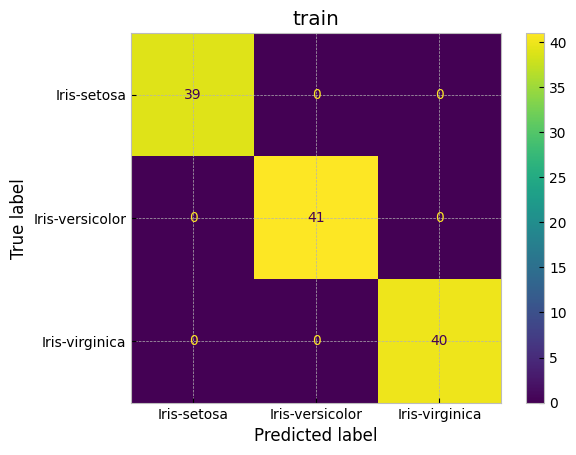

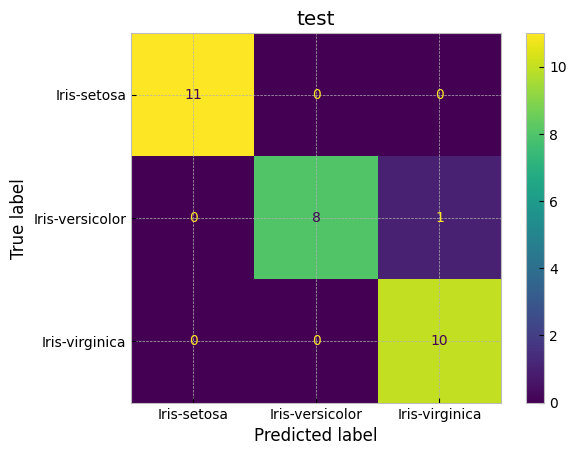

,SVM,tuned SVM,D-Tree
Accuracy test,0.933333,0.933333,0.966667
Accuracy train,0.983333,0.983333,1.000000
Precision test,0.933333,0.933333,0.969697
Precision train,0.984127,0.984127,1.000000
Recall test,0.933333,0.933333,0.966667
Recall train,0.983333,0.983333,1.000000
F1 macro test,0.933333,0.933333,0.966480
F1 macro train,0.983328,0.983328,1.000000


In [22]:
dt = tree.DecisionTreeClassifier()
score = evaluation(dt, x_train, x_test, y_train, y_test)
evals['D-Tree'] = score
evals

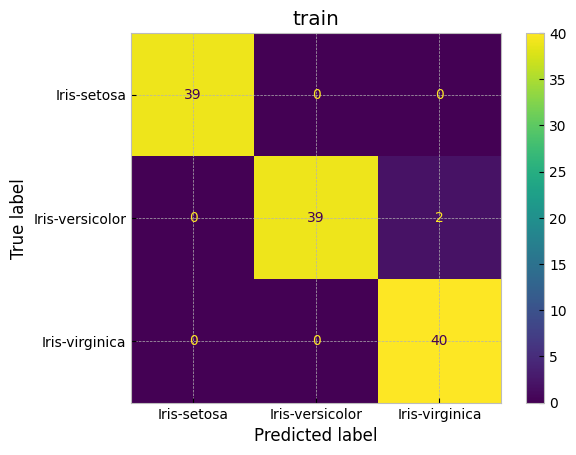

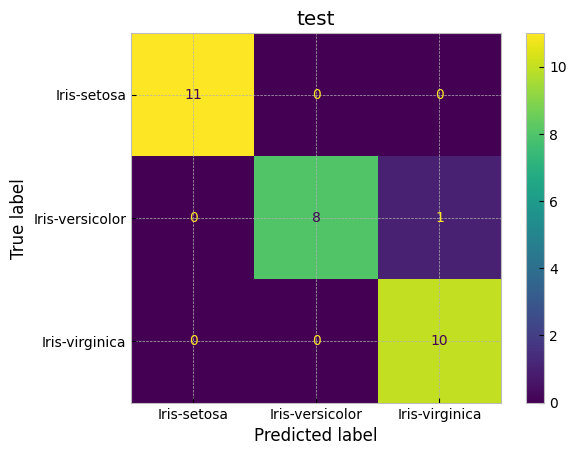

,SVM,tuned SVM,D-Tree,tuned D-Tree
Accuracy test,0.933333,0.933333,0.966667,0.966667
Accuracy train,0.983333,0.983333,1.000000,0.983333
Precision test,0.933333,0.933333,0.969697,0.969697
Precision train,0.984127,0.984127,1.000000,0.984127
Recall test,0.933333,0.933333,0.966667,0.966667
Recall train,0.983333,0.983333,1.000000,0.983333
F1 macro test,0.933333,0.933333,0.966480,0.966480
F1 macro train,0.983328,0.983328,1.000000,0.983328


In [23]:
# tune hyperparameters, we will use randomsearch for computation time since a lot of params
param_grid = {'criterion':['gini','entropy','log_loss'],
              'max_depth':np.arange(1,10,1),
              'min_samples_split':np.arange(2,5,1),
              'min_samples_leaf':np.arange(1,5,1),
              'min_impurity_decrease':np.arange(0,0.2,0.05)}
# criterion are all ways to describe purity of nodes
rskf = RepeatedStratifiedKFold(n_repeats=3,random_state=42)
tuned = RandomizedSearchCV(estimator=dt,param_distributions=param_grid,cv=rskf)
tuned.fit(x_train,y_train.values.ravel())

best_params = tuned.best_params_
dt_tuned = tree.DecisionTreeClassifier(criterion=best_params['criterion'],
                                       max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'],
                                       min_samples_leaf=best_params['min_samples_leaf'], 
                                       min_impurity_decrease=best_params['min_impurity_decrease'])
score = evaluation(dt_tuned,x_train,x_test,y_train,y_test)
evals['tuned D-Tree'] = score
evals


### 5.3 Random Forests
A LOT of decision trees. Decision trees are made based on a bootstrapped dataset, that is, a separate dataset that pulls data (possibly repreated) from the original dataset.

c:\Users\brady\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


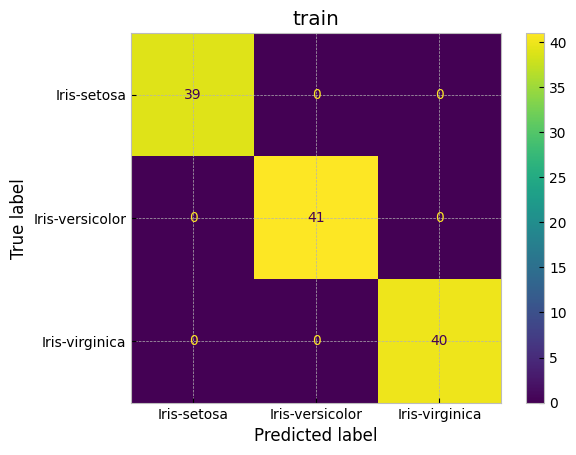

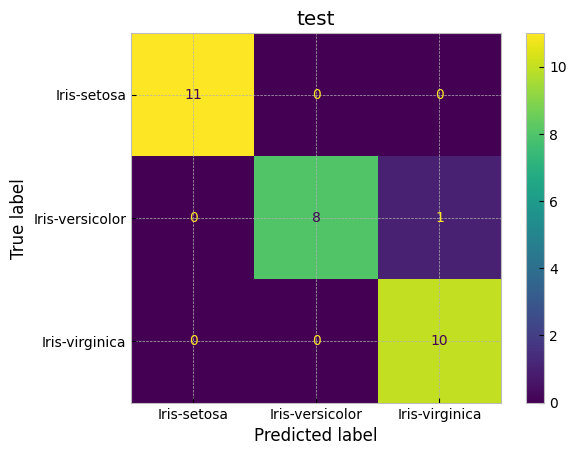

,SVM,tuned SVM,D-Tree,tuned D-Tree,RF
Accuracy test,0.933333,0.933333,0.966667,0.966667,0.966667
Accuracy train,0.983333,0.983333,1.000000,0.983333,1.000000
Precision test,0.933333,0.933333,0.969697,0.969697,0.969697
Precision train,0.984127,0.984127,1.000000,0.984127,1.000000
Recall test,0.933333,0.933333,0.966667,0.966667,0.966667
Recall train,0.983333,0.983333,1.000000,0.983333,1.000000
F1 macro test,0.933333,0.933333,0.966480,0.966480,0.966480
F1 macro train,0.983328,0.983328,1.000000,0.983328,1.000000


In [ ]:
rf = RandomForestClassifier(random_state=42)
# can score it based off of out-of-bag score rather than accuracy if i want
# will use accuracy since its generalized for other model comparison
score = evaluation(rf, x_train, x_test, y_train.values.ravel(), y_test)
evals['RF'] = score
evals

c:\Users\brady\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


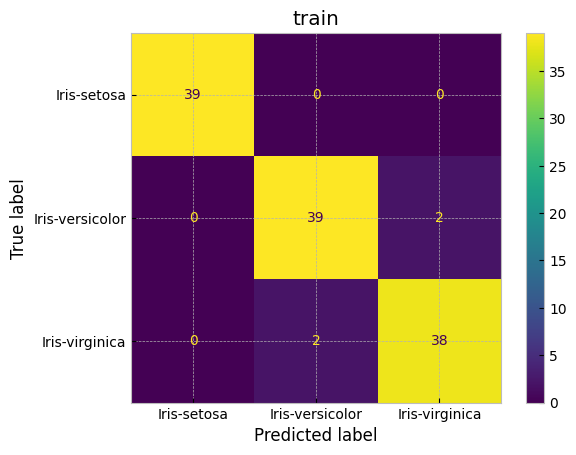

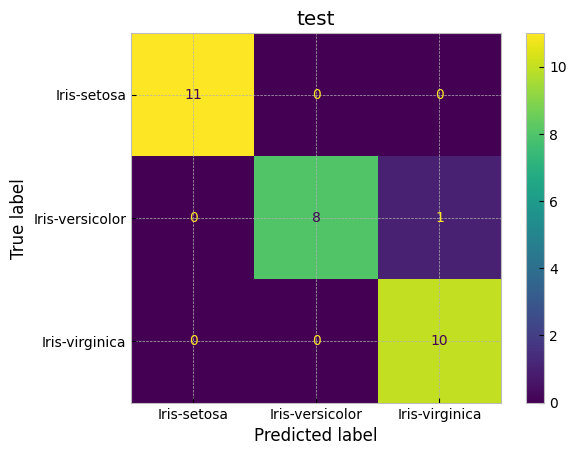

,SVM,tuned SVM,D-Tree,tuned D-Tree,RF,tuned RF
Accuracy test,0.933333,0.933333,0.966667,0.966667,0.966667,0.966667
Accuracy train,0.983333,0.983333,1.000000,0.983333,1.000000,0.966667
Precision test,0.933333,0.933333,0.969697,0.969697,0.969697,0.969697
Precision train,0.984127,0.984127,1.000000,0.984127,1.000000,0.966667
Recall test,0.933333,0.933333,0.966667,0.966667,0.966667,0.966667
Recall train,0.983333,0.983333,1.000000,0.983333,1.000000,0.966667
F1 macro test,0.933333,0.933333,0.966480,0.966480,0.966480,0.966480
F1 macro train,0.983328,0.983328,1.000000,0.983328,1.000000,0.966667


In [ ]:
# evaluating random forest, uses same grid param as decisions
param_grid = {'n_estimators':np.arange(50,150,10),
              'criterion':['gini','entropy','log_loss'],
              'max_depth':np.arange(1,10,1),
              'min_samples_split':np.arange(2,5,1),
              'min_samples_leaf':np.arange(1,5,1),
              'min_impurity_decrease':np.arange(0,0.2,0.05)}
# criterion are all ways to describe purity of nodes
rskf = RepeatedStratifiedKFold(n_repeats=3,random_state=42)
tuned = RandomizedSearchCV(estimator=rf,param_distributions=param_grid,cv=rskf)
tuned.fit(x_train,y_train.values.ravel())

best_params = tuned.best_params_
rf_tuned = RandomForestClassifier(criterion=best_params['criterion'],
                                    max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'],
                                    min_samples_leaf=best_params['min_samples_leaf'], 
                                    min_impurity_decrease=best_params['min_impurity_decrease'])
score = evaluation(rf_tuned,x_train,x_test,y_train.values.ravel(),y_test)
evals['tuned RF'] = score
evals


### 5.4 K-Nearest Neighbors
When a new point is introduced, the model decides where to classify it based off of the distance from its k-nearest neighbors.


c:\Users\brady\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


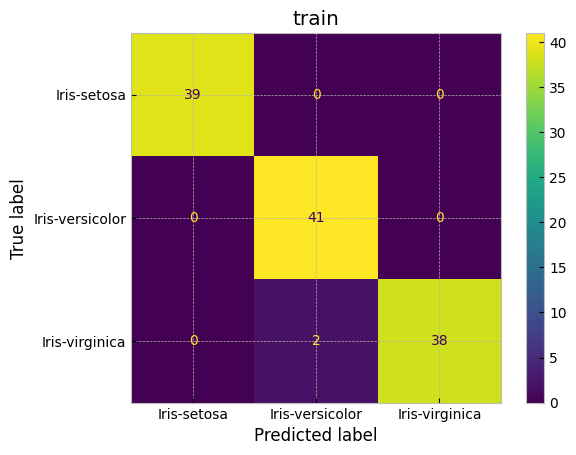

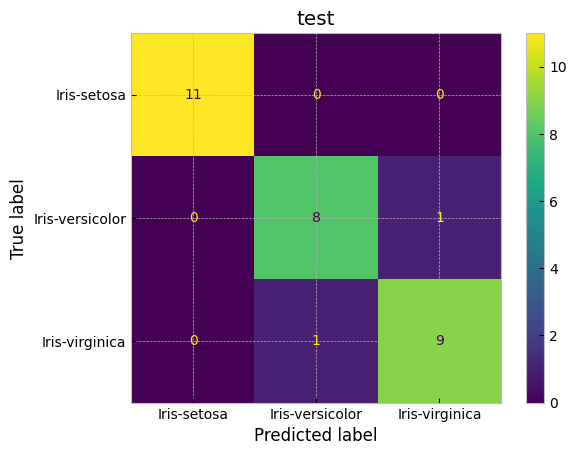

,SVM,tuned SVM,D-Tree,tuned D-Tree,RF,tuned RF,KNN
Accuracy test,0.933333,0.933333,0.966667,0.966667,0.966667,0.966667,0.933333
Accuracy train,0.983333,0.983333,1.000000,0.983333,1.000000,0.966667,0.983333
Precision test,0.933333,0.933333,0.969697,0.969697,0.969697,0.969697,0.933333
Precision train,0.984127,0.984127,1.000000,0.984127,1.000000,0.966667,0.984109
Recall test,0.933333,0.933333,0.966667,0.966667,0.966667,0.966667,0.933333
Recall train,0.983333,0.983333,1.000000,0.983333,1.000000,0.966667,0.983333
F1 macro test,0.933333,0.933333,0.966480,0.966480,0.966480,0.966480,0.933333
F1 macro train,0.983328,0.983328,1.000000,0.983328,1.000000,0.966667,0.983318


In [ ]:
knn = KNeighborsClassifier()
score = evaluation(knn, x_train_standard, x_test_standard, y_train.values.ravel(), y_test)
evals['KNN'] = score
evals

c:\Users\brady\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


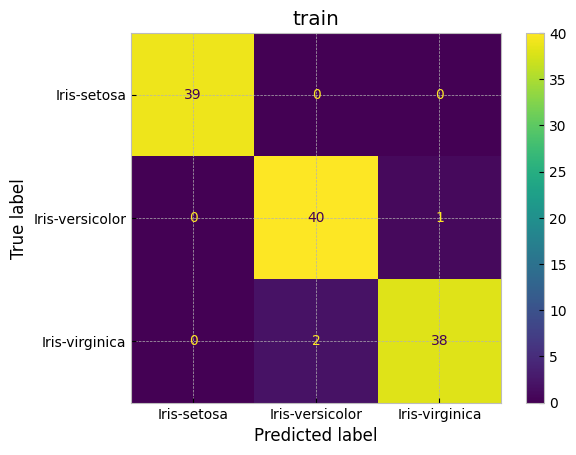

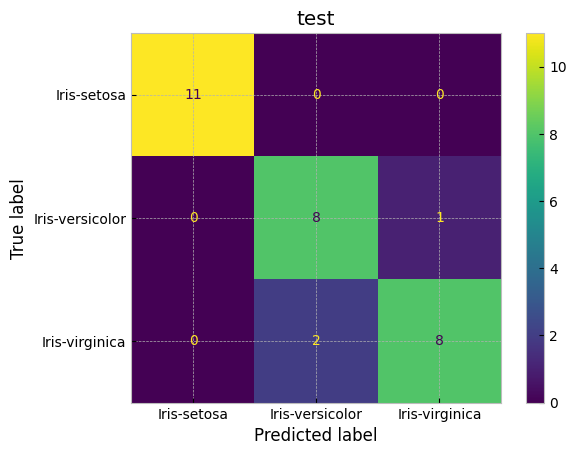

,SVM,tuned SVM,D-Tree,tuned D-Tree,RF,tuned RF,KNN,tuned KNN
Accuracy test,0.933333,0.933333,0.966667,0.966667,0.966667,0.966667,0.933333,0.900000
Accuracy train,0.983333,0.983333,1.000000,0.983333,1.000000,0.966667,0.983333,0.975000
Precision test,0.933333,0.933333,0.969697,0.969697,0.969697,0.969697,0.933333,0.902963
Precision train,0.984127,0.984127,1.000000,0.984127,1.000000,0.966667,0.984109,0.975183
Recall test,0.933333,0.933333,0.966667,0.966667,0.966667,0.966667,0.933333,0.900000
Recall train,0.983333,0.983333,1.000000,0.983333,1.000000,0.966667,0.983333,0.975000
F1 macro test,0.933333,0.933333,0.966480,0.966480,0.966480,0.966480,0.933333,0.900000
F1 macro train,0.983328,0.983328,1.000000,0.983328,1.000000,0.966667,0.983318,0.974992


In [ ]:
# will use grid search since not too many parameters
param_grid = {'n_neighbors':np.arange(1,20,1),
              'algorithm':['auto','ball_tree','kd_tree','brute'],
              'leaf_size':np.arange(10,40,1)}

tuned = GridSearchCV(knn, param_grid, cv=rskf)
tuned.fit(x_train_standard,y_train.values.ravel())

best_params = tuned.best_params_
knn_tuned = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                                 algorithm=best_params['algorithm'],
                                 leaf_size=best_params['leaf_size'])
score = evaluation(knn_tuned, x_train_standard, x_test_standard, y_train.values.ravel(), y_test)
evals['tuned KNN'] = score
evals

### 5.5 Gradient Boosting
Start with an overall probability for one prediction of a class -> Build a tree based on the features and residuals, difference of observed - predicted prob. -> for classification, transform the residual values to modify new predicted prob. -> continue for n trees. Note, trees should not have too little leaves to prevent overfitting.

When to use?
* High accuracy - often outerforms RFs and SVMs on complex datasets
* Non-linear data - can model complex interactions
* Class imbalances - handles them better than many models
* Feature importance insights - can show which features contribue most to predictions

c:\Users\brady\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


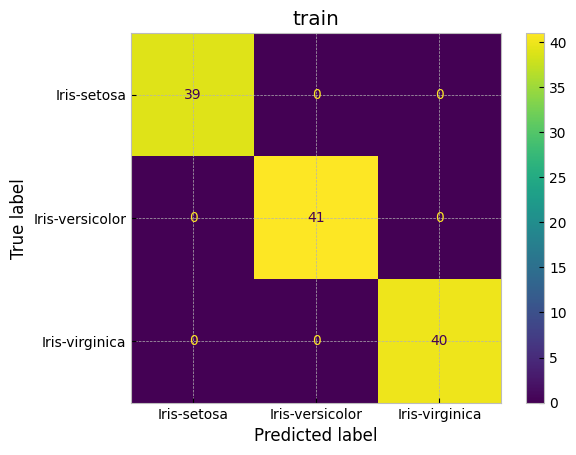

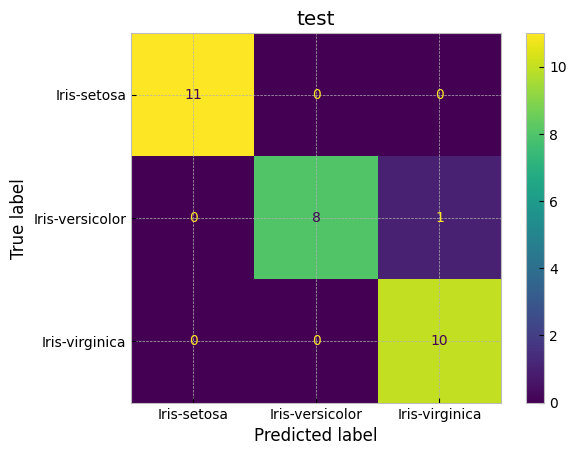

,SVM,tuned SVM,D-Tree,tuned D-Tree,RF,tuned RF,KNN,tuned KNN,GB
Accuracy test,0.933333,0.933333,0.966667,0.966667,0.966667,0.966667,0.933333,0.900000,0.966667
Accuracy train,0.983333,0.983333,1.000000,0.983333,1.000000,0.966667,0.983333,0.975000,1.000000
Precision test,0.933333,0.933333,0.969697,0.969697,0.969697,0.969697,0.933333,0.902963,0.969697
Precision train,0.984127,0.984127,1.000000,0.984127,1.000000,0.966667,0.984109,0.975183,1.000000
Recall test,0.933333,0.933333,0.966667,0.966667,0.966667,0.966667,0.933333,0.900000,0.966667
Recall train,0.983333,0.983333,1.000000,0.983333,1.000000,0.966667,0.983333,0.975000,1.000000
F1 macro test,0.933333,0.933333,0.966480,0.966480,0.966480,0.966480,0.933333,0.900000,0.966480
F1 macro train,0.983328,0.983328,1.000000,0.983328,1.000000,0.966667,0.983318,0.974992,1.000000


In [ ]:
gb = GradientBoostingClassifier(random_state=42)

score = evaluation(gb, x_train, x_test, y_train.values.ravel(), y_test)
evals['GB'] = score
evals

c:\Users\brady\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


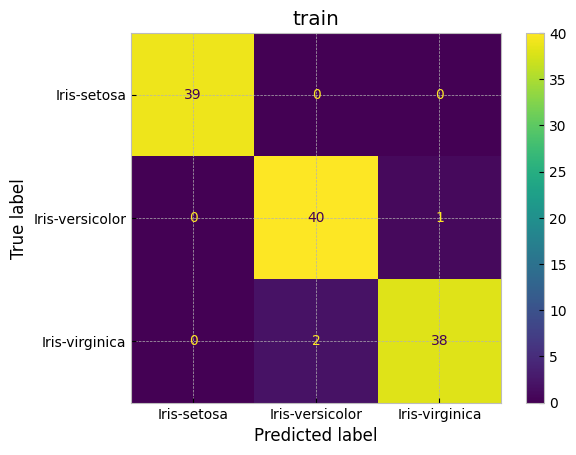

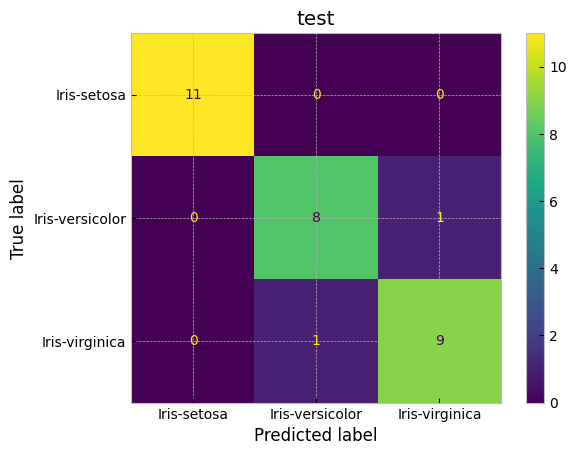

,SVM,tuned SVM,D-Tree,tuned D-Tree,RF,tuned RF,KNN,tuned KNN,GB,tuned GB
Accuracy test,0.933333,0.933333,0.966667,0.966667,0.966667,0.966667,0.933333,0.900000,0.966667,0.933333
Accuracy train,0.983333,0.983333,1.000000,0.983333,1.000000,0.966667,0.983333,0.975000,1.000000,0.975000
Precision test,0.933333,0.933333,0.969697,0.969697,0.969697,0.969697,0.933333,0.902963,0.969697,0.933333
Precision train,0.984127,0.984127,1.000000,0.984127,1.000000,0.966667,0.984109,0.975183,1.000000,0.975183
Recall test,0.933333,0.933333,0.966667,0.966667,0.966667,0.966667,0.933333,0.900000,0.966667,0.933333
Recall train,0.983333,0.983333,1.000000,0.983333,1.000000,0.966667,0.983333,0.975000,1.000000,0.975000
F1 macro test,0.933333,0.933333,0.966480,0.966480,0.966480,0.966480,0.933333,0.900000,0.966480,0.933333
F1 macro train,0.983328,0.983328,1.000000,0.983328,1.000000,0.966667,0.983318,0.974992,1.000000,0.974992


In [ ]:
# tune gb, since its like forest, we use those params + additional ones
param_grid = {'n_estimators':np.arange(100,150,10), # large typically better
              'criterion':['friedman_mse','squared_error'],
              'max_depth':np.arange(1,10,1),
              'min_samples_split':np.arange(2,10,1),
              'min_samples_leaf':np.arange(8,32,1),
              'min_impurity_decrease':np.arange(0,0.2,0.05)}

tuned = RandomizedSearchCV(gb, param_grid, cv=rskf)
tuned.fit(x_train,y_train.values.ravel())

best_params = tuned.best_params_
# best_params
gb_tuned = GradientBoostingClassifier(n_estimators=best_params['n_estimators'],
                                      criterion=best_params['criterion'],
                                      max_depth=best_params['max_depth'],
                                      min_samples_split=best_params['min_samples_split'],
                                      min_samples_leaf=best_params['min_samples_leaf'],
                                      min_impurity_decrease=best_params['min_impurity_decrease'])
score = evaluation(gb_tuned, x_train, x_test, y_train.values.ravel(), y_test)
evals['tuned GB'] = score
evals

### 5.6 Naive Bayes 
We will use GaussianNB. This model assumes features are normal, and is used for continuous data. MultinomialNB works for count-based/discrete data and BernoulliNB works for binary data. 

The way it works is we determine the probabilities of having certain feature values for every class, then we compare the total and see which has the highest probability given all the features. For Guassian, this means we calculate the probabilities of petal and sepal length/width according to their gaussian distribution.


c:\Users\brady\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


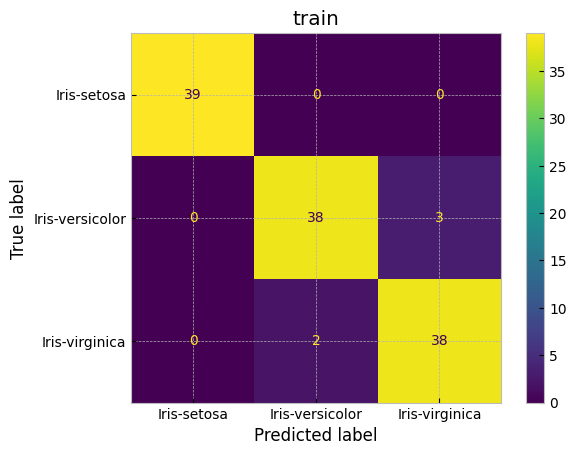

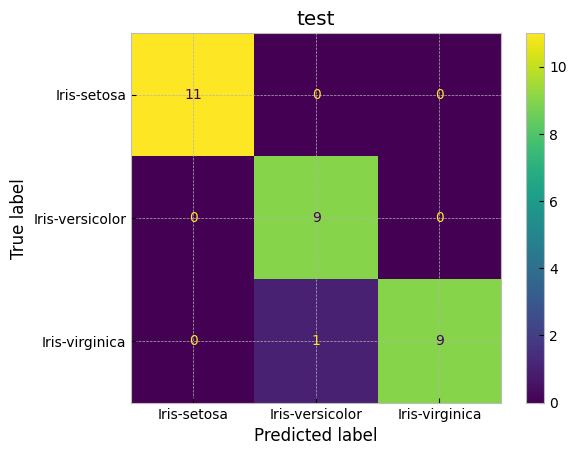

,SVM,tuned SVM,D-Tree,tuned D-Tree,RF,tuned RF,KNN,tuned KNN,GB,tuned GB,GNB
Accuracy test,0.933333,0.933333,0.966667,0.966667,0.966667,0.966667,0.933333,0.900000,0.966667,0.933333,0.966667
Accuracy train,0.983333,0.983333,1.000000,0.983333,1.000000,0.966667,0.983333,0.975000,1.000000,0.975000,0.958333
Precision test,0.933333,0.933333,0.969697,0.969697,0.969697,0.969697,0.933333,0.902963,0.969697,0.933333,0.970000
Precision train,0.984127,0.984127,1.000000,0.984127,1.000000,0.966667,0.984109,0.975183,1.000000,0.975183,0.958526
Recall test,0.933333,0.933333,0.966667,0.966667,0.966667,0.966667,0.933333,0.900000,0.966667,0.933333,0.966667
Recall train,0.983333,0.983333,1.000000,0.983333,1.000000,0.966667,0.983333,0.975000,1.000000,0.975000,0.958333
F1 macro test,0.933333,0.933333,0.966480,0.966480,0.966480,0.966480,0.933333,0.900000,0.966480,0.933333,0.966667
F1 macro train,0.983328,0.983328,1.000000,0.983328,1.000000,0.966667,0.983318,0.974992,1.000000,0.974992,0.958333


In [ ]:
gnb = GaussianNB()

scores = evaluation(gnb, x_train, x_test, y_train.values.ravel(), y_test)
evals['GNB'] = scores
evals

c:\Users\brady\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


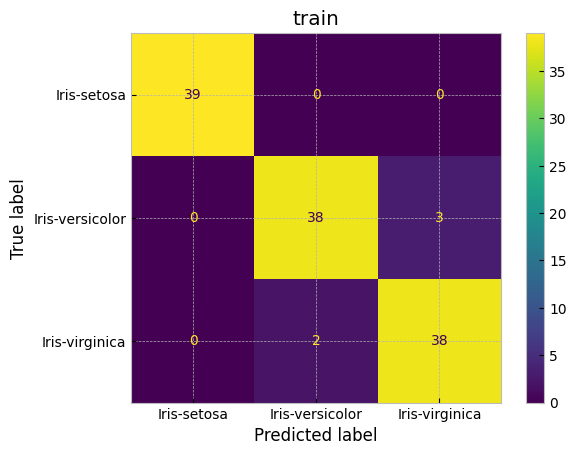

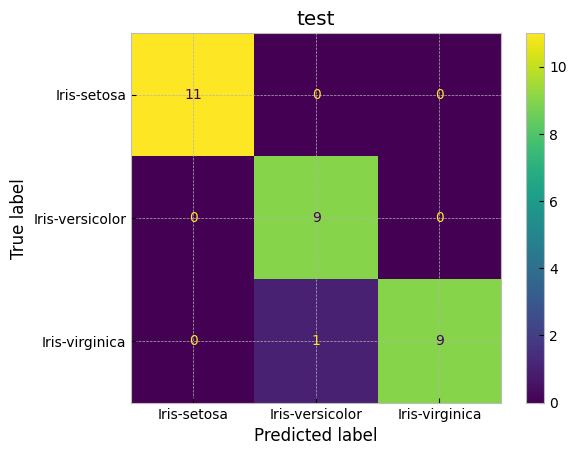

,SVM,tuned SVM,D-Tree,tuned D-Tree,RF,tuned RF,KNN,tuned KNN,GB,tuned GB,GNB,tuned GNB
Accuracy test,0.933333,0.933333,0.966667,0.966667,0.966667,0.966667,0.933333,0.900000,0.966667,0.933333,0.966667,0.966667
Accuracy train,0.983333,0.983333,1.000000,0.983333,1.000000,0.966667,0.983333,0.975000,1.000000,0.975000,0.958333,0.958333
Precision test,0.933333,0.933333,0.969697,0.969697,0.969697,0.969697,0.933333,0.902963,0.969697,0.933333,0.970000,0.970000
Precision train,0.984127,0.984127,1.000000,0.984127,1.000000,0.966667,0.984109,0.975183,1.000000,0.975183,0.958526,0.958526
Recall test,0.933333,0.933333,0.966667,0.966667,0.966667,0.966667,0.933333,0.900000,0.966667,0.933333,0.966667,0.966667
Recall train,0.983333,0.983333,1.000000,0.983333,1.000000,0.966667,0.983333,0.975000,1.000000,0.975000,0.958333,0.958333
F1 macro test,0.933333,0.933333,0.966480,0.966480,0.966480,0.966480,0.933333,0.900000,0.966480,0.933333,0.966667,0.966667
F1 macro train,0.983328,0.983328,1.000000,0.983328,1.000000,0.966667,0.983318,0.974992,1.000000,0.974992,0.958333,0.958333


In [ ]:
param_grid = {'var_smoothing': np.arange(1e-10, 1e-8, 1e-9)}

tuned = GridSearchCV(gnb, param_grid, cv=rskf)
tuned.fit(x_train,y_train.values.ravel())

best_params = tuned.best_params_
gnb_tuned = GaussianNB(var_smoothing=best_params['var_smoothing'])
score = evaluation(gnb_tuned, x_train, x_test, y_train.values.ravel(), y_test)
evals['tuned GNB'] = score
evals

### 5.7 Neural Network
Overkill, but to see    

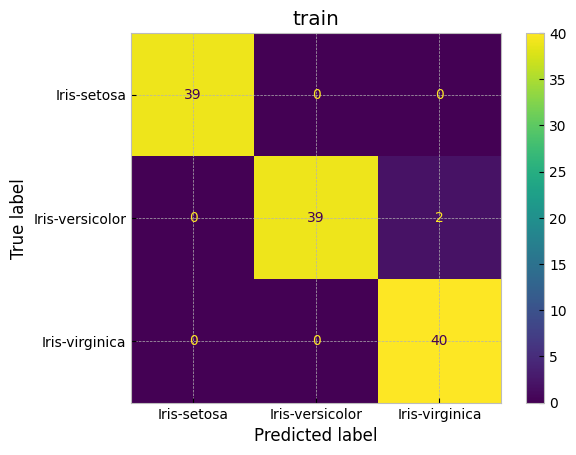

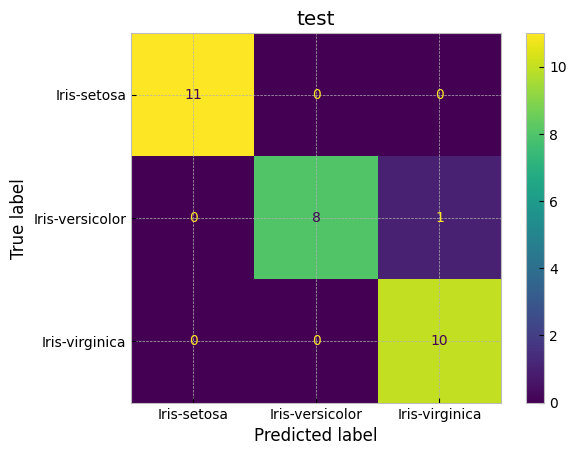

,SVM,tuned SVM,D-Tree,tuned D-Tree,RF,tuned RF,KNN,tuned KNN,GB,tuned GB,GNB,tuned GNB,NL,tuned NL
Accuracy test,0.933333,0.933333,0.966667,0.966667,0.966667,0.966667,0.933333,0.900000,0.966667,0.933333,0.966667,0.966667,0.966667,0.966667
Accuracy train,0.983333,0.983333,1.000000,0.983333,1.000000,0.966667,0.983333,0.975000,1.000000,0.975000,0.958333,0.958333,0.983333,0.983333
Precision test,0.933333,0.933333,0.969697,0.969697,0.969697,0.969697,0.933333,0.902963,0.969697,0.933333,0.970000,0.970000,0.969697,0.969697
Precision train,0.984127,0.984127,1.000000,0.984127,1.000000,0.966667,0.984109,0.975183,1.000000,0.975183,0.958526,0.958526,0.984127,0.984127
Recall test,0.933333,0.933333,0.966667,0.966667,0.966667,0.966667,0.933333,0.900000,0.966667,0.933333,0.966667,0.966667,0.966667,0.966667
Recall train,0.983333,0.983333,1.000000,0.983333,1.000000,0.966667,0.983333,0.975000,1.000000,0.975000,0.958333,0.958333,0.983333,0.983333
F1 macro test,0.933333,0.933333,0.966480,0.966480,0.966480,0.966480,0.933333,0.900000,0.966480,0.933333,0.966667,0.966667,0.966480,0.966480
F1 macro train,0.983328,0.983328,1.000000,0.983328,1.000000,0.966667,0.983318,0.974992,1.000000,0.974992,0.958333,0.958333,0.983328,0.983328


In [58]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

# Initialize the MLPClassifier with increased max_iter
nL = MLPClassifier(max_iter=500)

def evaluate_model():
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        score = evaluation(nL, x_train, x_test, y_train.values.ravel(), y_test)
    return score

evals['NL'] = evaluate_model()
evals

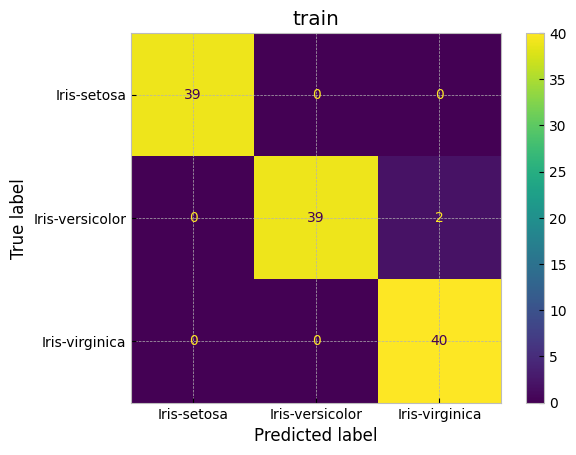

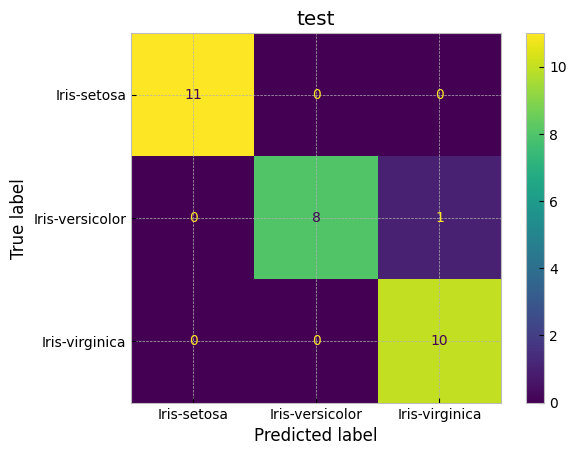

,SVM,tuned SVM,D-Tree,tuned D-Tree,RF,tuned RF,KNN,tuned KNN,GB,tuned GB,GNB,tuned GNB,NL,tuned NL
Accuracy test,0.933333,0.933333,0.966667,0.966667,0.966667,0.966667,0.933333,0.900000,0.966667,0.933333,0.966667,0.966667,0.966667,0.966667
Accuracy train,0.983333,0.983333,1.000000,0.983333,1.000000,0.966667,0.983333,0.975000,1.000000,0.975000,0.958333,0.958333,0.983333,0.983333
Precision test,0.933333,0.933333,0.969697,0.969697,0.969697,0.969697,0.933333,0.902963,0.969697,0.933333,0.970000,0.970000,0.969697,0.969697
Precision train,0.984127,0.984127,1.000000,0.984127,1.000000,0.966667,0.984109,0.975183,1.000000,0.975183,0.958526,0.958526,0.984127,0.984127
Recall test,0.933333,0.933333,0.966667,0.966667,0.966667,0.966667,0.933333,0.900000,0.966667,0.933333,0.966667,0.966667,0.966667,0.966667
Recall train,0.983333,0.983333,1.000000,0.983333,1.000000,0.966667,0.983333,0.975000,1.000000,0.975000,0.958333,0.958333,0.983333,0.983333
F1 macro test,0.933333,0.933333,0.966480,0.966480,0.966480,0.966480,0.933333,0.900000,0.966480,0.933333,0.966667,0.966667,0.966480,0.966480
F1 macro train,0.983328,0.983328,1.000000,0.983328,1.000000,0.966667,0.983318,0.974992,1.000000,0.974992,0.958333,0.958333,0.983328,0.983328


In [61]:
param_grid = { 'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],
            'activation': ['tanh', 'relu'],
            'solver': ['sgd', 'adam'],
            'alpha': [0.0001, 0.001, 0.01],
            'learning_rate': ['constant', 'adaptive']
        }


with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    tuned = RandomizedSearchCV(nL, param_grid, cv=rskf)
    tuned.fit(x_train, y_train.values.ravel())
    best_params = tuned.best_params_
    nL_tuned = MLPClassifier(hidden_layer_sizes=best_params['hidden_layer_sizes'],
                            activation=best_params['activation'],
                            solver=best_params['solver'],
                            alpha=best_params['alpha'],
                            learning_rate=best_params['learning_rate'], random_state=42)
    score = evaluation(nL_tuned, x_train, x_test, y_train.values.ravel(), y_test)


evals['tuned NL'] = score
evals


In [45]:
evals_t = evals.transpose()
remove_models = evals_t[evals_t['Accuracy test'] < .96].index
remove_models
top = evals_t.drop(remove_models)
top

,Accuracy test,Accuracy train,Precision test,Precision train,Recall test,Recall train,F1 macro test,F1 macro train
D-Tree,0.966667,1.000000,0.969697,1.000000,0.966667,1.000000,0.966480,1.000000
tuned D-Tree,0.966667,0.983333,0.969697,0.984127,0.966667,0.983333,0.966480,0.983328
RF,0.966667,1.000000,0.969697,1.000000,0.966667,1.000000,0.966480,1.000000
tuned RF,0.966667,0.966667,0.969697,0.966667,0.966667,0.966667,0.966480,0.966667
GB,0.966667,1.000000,0.969697,1.000000,0.966667,1.000000,0.966480,1.000000
GNB,0.966667,0.958333,0.970000,0.958526,0.966667,0.958333,0.966667,0.958333
tuned GNB,0.966667,0.958333,0.970000,0.958526,0.966667,0.958333,0.966667,0.958333
NL,0.966667,0.975000,0.969697,0.976744,0.966667,0.975000,0.966480,0.974977
tuned NL,0.966667,0.983333,0.969697,0.984127,0.966667,0.983333,0.966480,0.983328
